# __Cleaning Method 1__
## Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../Capstone/Data/FirstClean_NHL_Goalie_Data.csv')

## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [3]:
data.skew()

Age      0.558895
GP       0.456877
GS       0.566194
W        0.922190
L        0.720957
T/O      1.132607
GA       0.524253
SA       0.546587
SV       0.571793
GAA     48.769030
SO       1.961241
GPS      0.904357
MIN      0.531631
QS       0.750438
RBS      0.873840
GSAA     0.587967
G       60.796283
A        7.159462
PTS     13.218166
PIM      4.141824
SV%     -4.721983
QS%     -0.462795
GA%      0.368016
dtype: float64

**_Applying the yeojohnson normalization method actually increased the skew in my data, therefore I removed the cells_**

In [4]:
data.dtypes

Player     object
Age         int64
Tm         object
GP          int64
GS        float64
W         float64
L         float64
T/O       float64
GA          int64
SA          int64
SV          int64
GAA       float64
SO          int64
GPS       float64
MIN         int64
QS        float64
RBS       float64
GSAA      float64
G           int64
A         float64
PTS       float64
PIM         int64
Season     object
SV%       float64
QS%       float64
GA%       float64
dtype: object

In [5]:
data.columns

Index(['Player', 'Age', 'Tm', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA', 'SV',
       'GAA', 'SO', 'GPS', 'MIN', 'QS', 'RBS', 'GSAA', 'G', 'A', 'PTS', 'PIM',
       'Season', 'SV%', 'QS%', 'GA%'],
      dtype='object')

## Z Score

In [6]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['Player','Tm','Season'], axis=1)

In [7]:
data_num.columns

Index(['Age', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA', 'SV', 'GAA', 'SO',
       'GPS', 'MIN', 'QS', 'RBS', 'GSAA', 'G', 'A', 'PTS', 'PIM', 'SV%', 'QS%',
       'GA%'],
      dtype='object')

In [8]:
data_objects=data.drop(['Age', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA', 'SV', 'GAA', 'SO',
       'GPS', 'MIN', 'QS', 'RBS', 'GSAA', 'G', 'A', 'PTS', 'PIM', 'SV%', 'QS%',
       'GA%'], axis=1)

In [9]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num = scaler.fit_transform(data_num)
data_num_zs = pd.DataFrame(data_num)

In [10]:
data_num_zs.columns=['Age', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA', 'SV', 'GAA', 'SO',
       'GPS', 'MIN', 'QS', 'RBS', 'GSAA', 'G', 'A', 'PTS', 'PIM', 'SV%', 'QS%',
       'GA%']

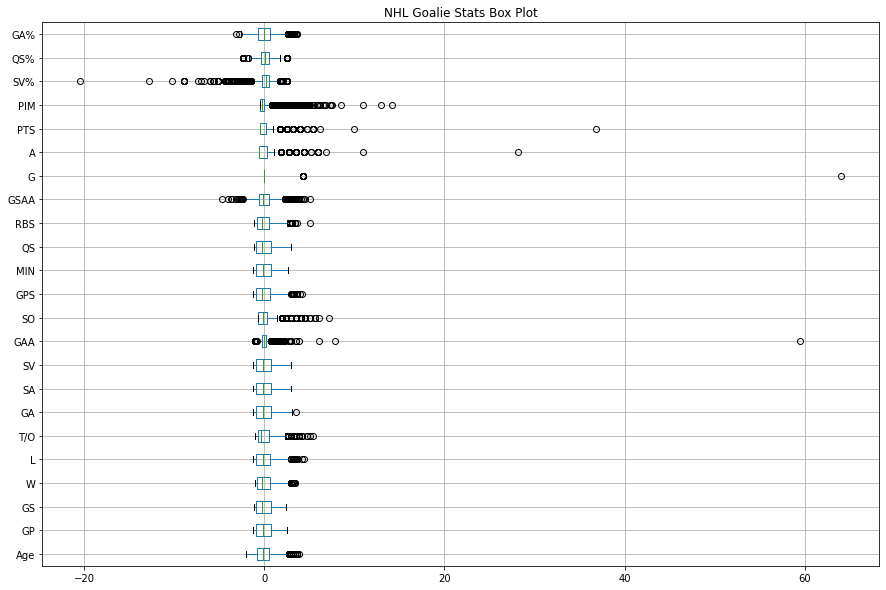

In [12]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Goalie Stats Box Plot')
plt.show()

**_The data clearly has not been scaled correctly. Lets see what 3 STD does_**

## 3 STD

In [13]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [14]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

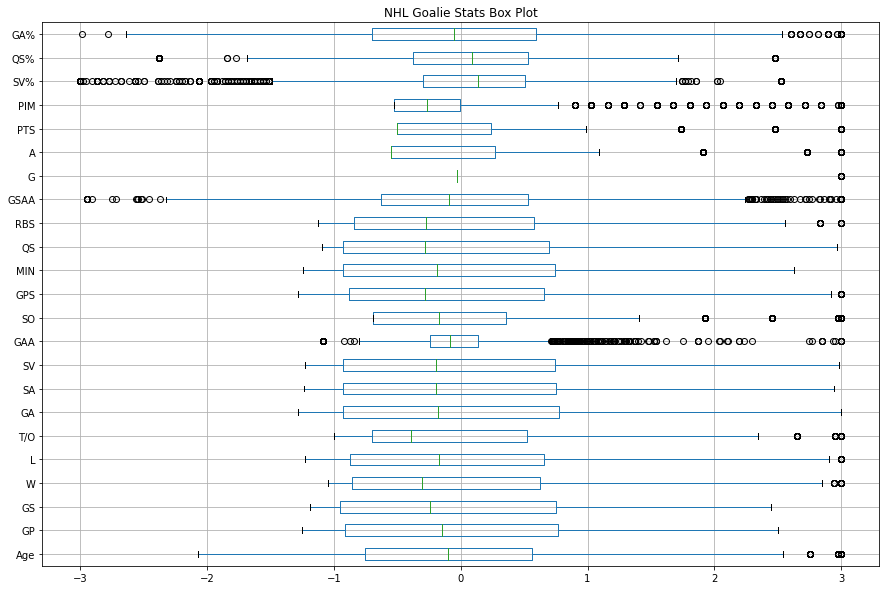

In [15]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Goalie Stats Box Plot')
plt.show()

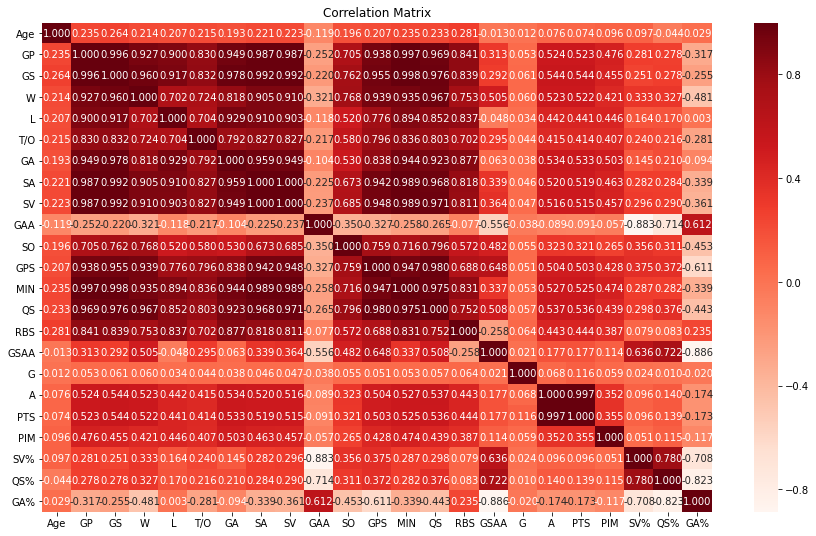

In [16]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [17]:
NHL_Gpipeline1=pd.concat([data_num_zs, data_objects], axis=1)

In [18]:
NHL_Gpipeline1.head()

,Age,GP,GS,W,L,T/O,GA,SA,SV,GAA,...,G,A,PTS,PIM,SV%,QS%,GA%,Player,Tm,Season
0,0.341054,-0.144241,-0.196829,0.068127,-0.522943,-0.088849,-0.465454,-0.152448,-0.118125,-0.378570,...,-0.027561,-0.548592,-0.504199,-0.527654,0.849357,0.859569,-1.488890,Jake Allen,STL,2019-20
1,0.560794,1.203973,1.268533,1.646089,0.303620,1.128773,1.152769,1.375709,1.392852,-0.148988,...,-0.027561,-0.548592,-0.504199,-0.527654,0.436481,0.139875,-0.124148,Frederik Andersen,TOR,2019-20
2,2.318719,0.337264,0.275868,-0.024694,0.775941,-0.393255,0.420310,0.449201,0.450090,-0.017798,...,-0.027561,0.271677,0.241776,-0.527654,0.275918,-0.185933,0.522309,Craig Anderson,OTT,2019-20
3,3.000346,-1.251702,-1.189494,-0.952906,-1.231425,-1.002066,-1.249014,-1.221495,-1.212533,0.287218,...,-0.027561,-0.548592,-0.504199,-0.527654,-2.063710,NaN,NaN,David Ayres,CAR,2019-20
4,0.780535,0.915070,0.748566,0.346591,1.366343,-0.088849,0.863192,1.004443,1.014651,-0.116190,...,-0.027561,1.912215,1.733726,-0.008993,0.390606,-0.365856,0.091338,Jonathan Bernier,DET,2019-20


In [19]:
NHL_Gpipeline1.to_csv('../Capstone/Data/NHL_Gpipeline1.csv', index=0)